In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [40]:
## @param G: NetworkX graph where nodes are students and edges are friendships
## @param partitions: Collection of sets of vertices that form the solution whose validity on G is being tested
## @param L: Rowdy groups
## @return List of rowdy groups that were not split up, which could be an empty list if they all were
def violated_rowdy_groups(G, partitions, L):
    violated = []
    for rowdy_group in L:
        rowdy_group = set(rowdy_group)
        for p in partitions:
            p = set(p)
            if len(rowdy_group - p) == 0:
                violated.append(set(rowdy_group))
                
                
    return violated

In [41]:
## @param v: Vertex to search for
## @param partitions: Collection of sets of vertices to search in
## @return First set of vertices in partitions in which v is located, or None if v 
## does not appear in any of the sets in partitions
def find(v, partitions):
    for p in partitions:
        if v in p:
            return p
        
    return None

In [42]:
## @param G: NetworkX graph where nodes are students and edges are friendships
## @param partitions: Collection of sets of vertices that form the solution whose validity on G is being tested
## @param L: Rowdy groups
## @param k: Number of buses
## @param s: Max number of students per bus
## @return True if solution (partitions) is valid
def valid(G, partitions, L, k, s):
    ## boolean flags that represent constraints that should be met. Set all to true initially
    bus_count = True # Should have k buses (partitions)
    bus_nonempty = True # No bus should be empty
    bus_capacity_limit = True # No bus should have more than s students
    no_double_counting = True # Can't have one student be in multiple buses
    no_lost_students = True # Can't have less students on buses than there are students
    no_gained_students = True # Can't have more students on buses than there are students
    rowdy_constraint = True # Can't have a rowdy group be a subset of any partition
    
    
    bus_count = (len(partitions) == k)
    bus_nonempty = min([len(p) for p in partitions]) > 0
    bus_capacity_limit = max([len(p) for p in partitions]) <= s
        
    for s in G.nodes:
        accounted_for = False
        for p in partitions:
            if s in p:
                if not accounted_for:
                    accounted_for = True
                else:
                    no_double_counting = False
                    
        if not accounted_for:
            no_lost_students = False
            
    for p in partitions:
        for s in p:
            if s not in G.nodes:
                no_gained_students = False
                break
                
        if not no_gained_students:
            break
            
    violated = violated_rowdy_groups(G, partitions, L)
    rowdy_constraint = len(violated) == 0
          
    
    if not bus_count:
        print("Do not have exactly k partitions")
    if not bus_nonempty:
        print("One or more buses are empty")
    if not bus_capacity_limit:
        print("One or more buses has more than s students")
    if not no_double_counting:
        print("One or more students is being double counted")
    if not no_lost_students:
        print("One or more students is not in any bus")
    if not no_gained_students:
        print("Have more students on buses than exist in G")
    if not rowdy_constraint:
        print("One or more rowdy groups are not broken up: ")
        print(violated)
        
    valid = bus_count*bus_nonempty*bus_capacity_limit*no_double_counting*no_lost_students*no_gained_students*rowdy_constraint
    
    if valid:
        print("All constraints satisfied")
            

In [43]:
G = nx.Graph()
V = [1, 2, 3, 4, 5]
E = [(1, 2), (2, 3), (3, 4), (4, 5)]
G.add_nodes_from(V)
G.add_edges_from(E)
L = [[1, 2, 3], [4, 5]]
k = 3
s = 2
partitions = [[1, 2], [5], [4, 3]]
valid(G, partitions, L, k, s)

All constraints satisfied


In [44]:
## @param G: NetworkX graph where nodes are students and edges are friendships
## @param partitions: Collection of sets of vertices that form the solution whose validity on G is being tested
## @param L: Rowdy groups
## @return percentage of edges (u, v) where u and v are both valid, and u, v ∈ Vi for some i
def score(G, partitions, L):
    violated = violated_rowdy_groups(G, partitions, L)
    
    vertex_validities = dict()
    
    for v in G.nodes:
        valid = True
        for group in violated:
            if v in group:
                valid = False
                break
        vertex_validities[v] = valid
        
    count = 0
    for u, v in G.edges:
        if vertex_validities[u] and vertex_validities[v]:
            u_partition = find(u, partitions)
            if u_partition and v in u_partition:
                count += 1
                
    return count / len(G.edges)

In [45]:
score(G, partitions, L)

0.5

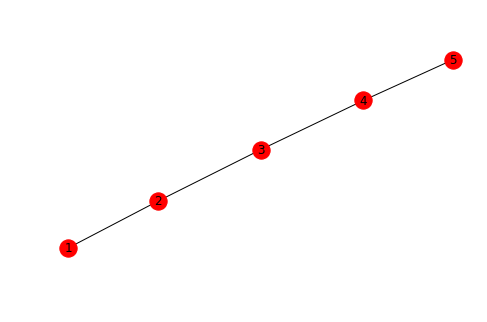

In [46]:
nx.draw(G, with_labels=True)

In [47]:
###400 Students Solution, 20 buses, 20 capacity
import random

StudentArr = [i for i in range(0,400)]
BusArrayMed = [[] for i in range(20)]
for x in BusArrayMed:
    for j in range(20):
        student = random.choice(StudentArr)
        x.append(student)
        StudentArr.remove(student)
print(BusArrayMed)

[[253, 227, 7, 205, 214, 341, 245, 222, 342, 241, 230, 130, 142, 64, 260, 221, 283, 181, 0, 8], [302, 165, 37, 390, 244, 113, 232, 148, 345, 371, 85, 329, 185, 134, 272, 284, 122, 321, 19, 355], [386, 229, 296, 344, 215, 104, 24, 172, 121, 194, 170, 225, 11, 237, 212, 4, 336, 160, 179, 174], [397, 40, 9, 308, 309, 254, 141, 324, 304, 76, 154, 374, 322, 95, 143, 266, 280, 375, 52, 258], [300, 29, 111, 362, 107, 294, 399, 163, 43, 128, 21, 74, 26, 248, 59, 251, 217, 23, 301, 125], [94, 115, 191, 350, 72, 394, 384, 12, 178, 119, 328, 182, 1, 243, 281, 286, 330, 10, 50, 268], [82, 123, 246, 351, 86, 175, 55, 228, 290, 14, 180, 54, 271, 240, 368, 264, 238, 158, 208, 98], [313, 316, 6, 129, 270, 282, 27, 202, 106, 223, 332, 108, 288, 97, 80, 369, 105, 257, 166, 357], [31, 89, 210, 153, 235, 209, 41, 279, 269, 176, 30, 120, 377, 35, 96, 28, 338, 263, 155, 285], [49, 117, 331, 127, 297, 306, 65, 216, 352, 87, 347, 16, 334, 157, 156, 353, 109, 363, 77, 315], [310, 335, 277, 372, 112, 325, 53, 4

[12, 11, 12, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


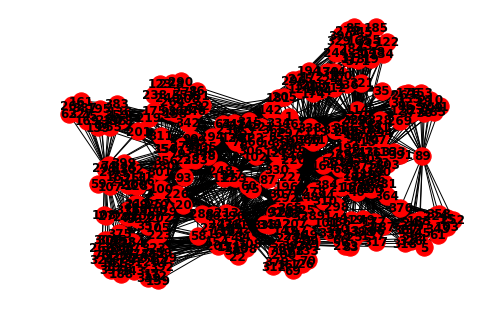

950
All constraints satisfied


0.7615755290173895

In [48]:
###Generate and Test Graph for Medium
from random import randint
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

GrMed = nx.Graph()
minFriends = []
for i in range(0,20):
    currBus = BusArrayMed[i]
    busMinFriends = 100
    GrMed.add_nodes_from(currBus)
    ###nx.draw(Gr, with_labels=True, font_weight='bold')
    ###plt.show()
    
    ###For each person on the bus
    for j in range(0,20):
        otherBusmates = [k for k in currBus if k != currBus[j]]
        ###print(otherBusmates)
        numberFriends = randint(11,19)
        if (numberFriends < busMinFriends):
            busMinFriends = numberFriends

        for l in range(numberFriends):
            currFriend = random.choice(otherBusmates)
            GrMed.add_edge(currBus[j], currFriend)
            otherBusmates.remove(currFriend)
            ###print(currFriend)
            ###print(list(Gr.edges))
    minFriends.append(busMinFriends)
    
print(minFriends)
            
"""Again, for each bus, and now add the 5 people from other buses 
at random that have a better solution than someone on this bus"""
rowdy_groupsMed = []
for i in range(0,20):
    otherBuses = [k for k in range(0,20) if k != i]
    for j in range(0,5):
        ###An index of every bus except current bus
        ###the person from another bus who will have friendships with current bus
        randomFriend = BusArrayMed[random.choice(otherBuses)][randint(0,19)]
        ###print(minFriends[i])
        numFriends = minFriends[i]+5
        ###Number of rowdy groups of size 2 this guy should be in
        numRowdy = numFriends - minFriends[i] + 1
        """print(numFriends)
        print("and diff")
        print(numRowdy)"""
        for l in range(numFriends):
            ###pick a friend from the current bus for each allowed friendship
            currentBus = [i for i in BusArrayMed[i]]
            currFriend = random.choice(currentBus)
            currentBus.remove(currFriend)
            GrMed.add_edge(randomFriend, currFriend)
            #adds 6 rowdy groups with friendships from the off-bus guy
            if (numRowdy > 0):
                rowdy_groupsMed.append([randomFriend, currFriend])
                numRowdy -= 1
                
for i in range(0, 350):
    rowdy_size = randint(3,10)
    group = []
    while (rowdy_size > 0):
        busNum = randint(0,19)
        prevBus = -10
        randomFriend = BusArrayMed[busNum][randint(0,19)]
        if (busNum != prevBus):
            if (randomFriend not in group):
                group.append(randomFriend)
                rowdy_size -= 1
    rowdy_groupsMed.append(group)
        
                
nx.draw(GrMed, with_labels=True, font_weight='bold')
plt.show()
print(len(rowdy_groupsMed))
valid(GrMed, BusArrayMed, rowdy_groupsMed, 20, 20)
score(GrMed, BusArrayMed, rowdy_groupsMed)

    
    
            

            

In [49]:
###900 Students Solution, 30 buses, 30 capacity
import random

StudentArr = [i for i in range(0,900)]
BusArrayLrg = [[] for i in range(30)]
for x in BusArrayLrg:
    for j in range(30):
        student = random.choice(StudentArr)
        x.append(student)
        StudentArr.remove(student)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


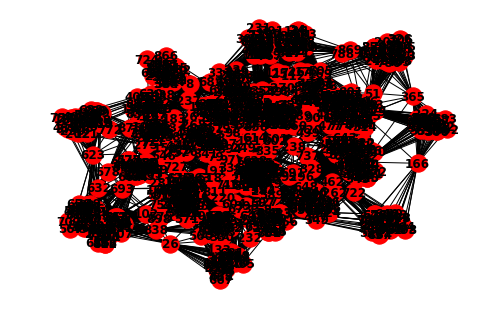

1700
All constraints satisfied


0.8458859679071355

In [50]:
###Generate and Test solution for Large
from random import randint
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

GrLrg = nx.Graph()
minFriends = []
for i in range(0,30):
    currBus = BusArrayLrg[i]
    busMinFriends = 100
    GrLrg.add_nodes_from(currBus)
    ###nx.draw(Gr, with_labels=True, font_weight='bold')
    ###plt.show()
    
    ###For each person on the bus
    for j in range(0,30):
        otherBusmates = [k for k in currBus if k != currBus[j]]
        ###print(otherBusmates)
        numberFriends = randint(16,29)
        if (numberFriends < busMinFriends):
            busMinFriends = numberFriends

        for l in range(numberFriends):
            currFriend = random.choice(otherBusmates)
            GrLrg.add_edge(currBus[j], currFriend)
            otherBusmates.remove(currFriend)
            ###print(currFriend)
            ###print(list(Gr.edges))
    minFriends.append(busMinFriends)
    
print(minFriends)
            
"""Again, for each bus, and now add the 5 people from other buses 
at random that have a better solution than someone on this bus"""
rowdy_groupsLrg = []
for i in range(0,30):
    otherBuses = [k for k in range(0,30) if k != i]
    for j in range(0,5):
        ###An index of every bus except current bus
        ###the person from another bus who will have friendships with current bus
        randomFriend = BusArrayLrg[random.choice(otherBuses)][randint(0,29)]
        ###print(minFriends[i])
        numFriends = minFriends[i]+5
        ###Number of rowdy groups of size 2 this guy should be in
        numRowdy = numFriends - minFriends[i] + 1
        """print(numFriends)
        print("and diff")
        print(numRowdy)"""
        for l in range(numFriends):
            ###pick a friend from the current bus for each allowed friendship
            currentBus = [i for i in BusArrayLrg[i]]
            currFriend = random.choice(currentBus)
            currentBus.remove(currFriend)
            GrLrg.add_edge(randomFriend, currFriend)
            #adds 6 rowdy groups with friendships from the off-bus guy
            if (numRowdy > 0):
                rowdy_groupsLrg.append([randomFriend, currFriend])
                numRowdy -= 1
                
for i in range(0, 800):
    rowdy_size = randint(3,10)
    group = []
    while (rowdy_size > 0):
        busNum = randint(0,29)
        prevBus = -10
        randomFriend = BusArrayLrg[busNum][randint(0,29)]
        if (busNum != prevBus):
            if (randomFriend not in group):
                group.append(randomFriend)
                rowdy_size -= 1
    rowdy_groupsLrg.append(group)
        
                
nx.draw(GrLrg, with_labels=True, font_weight='bold')
plt.show()
print(len(rowdy_groupsLrg))
valid(GrLrg, BusArrayLrg, rowdy_groupsLrg, 30, 30)
score(GrLrg, BusArrayLrg, rowdy_groupsLrg)

In [51]:
###49 Students Solution, 7 buses, 7 capacity
import random

StudentArr = [i for i in range(0,49)]
BusArraySml = [[] for i in range(7)]
for x in BusArraySml:
    for j in range(7):
        student = random.choice(StudentArr)
        x.append(student)
        StudentArr.remove(student)
print(BusArraySml)

[[9, 36, 16, 25, 13, 26, 40], [5, 47, 18, 32, 30, 12, 6], [17, 4, 44, 14, 34, 39, 41], [8, 24, 3, 29, 46, 11, 2], [43, 22, 38, 21, 37, 27, 48], [7, 35, 1, 23, 15, 28, 19], [0, 31, 45, 42, 33, 20, 10]]


[4, 4, 4, 4, 4, 4, 4]


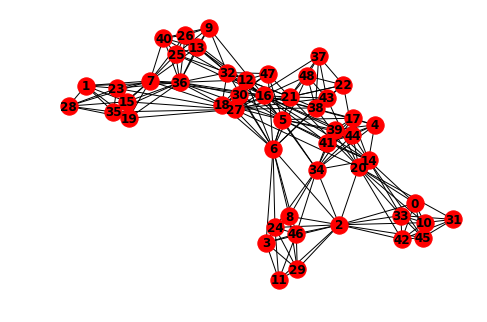

99
All constraints satisfied


0.6556603773584906

In [52]:
###Generate and Test solution for Sml
from random import randint
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

GrSml = nx.Graph()
minFriends = []
for i in range(0,7):
    currBus = BusArraySml[i]
    busMinFriends = 100
    GrSml.add_nodes_from(currBus)
    ###nx.draw(Gr, with_labels=True, font_weight='bold')
    ###plt.show()
    
    ###For each person on the bus
    for j in range(0,7):
        otherBusmates = [k for k in currBus if k != currBus[j]]
        ###print(otherBusmates)
        numberFriends = randint(4,6)
        if (numberFriends < busMinFriends):
            busMinFriends = numberFriends

        for l in range(numberFriends):
            currFriend = random.choice(otherBusmates)
            GrSml.add_edge(currBus[j], currFriend)
            otherBusmates.remove(currFriend)
            ###print(currFriend)
            ###print(list(Gr.edges))
    minFriends.append(busMinFriends)
    
print(minFriends)
            
"""Again, for each bus, and now add the 5 people from other buses 
at random that have a better solution than someone on this bus"""
rowdy_groupsSml = []
for i in range(0,7):
    otherBuses = [k for k in range(0,7) if k != i]
    for j in range(0,2):
        ###An index of every bus except current bus
        ###the person from another bus who will have friendships with current bus
        randomFriend = BusArraySml[random.choice(otherBuses)][randint(0,6)]
        ###print(minFriends[i])
        numFriends = minFriends[i]+5
        ###Number of rowdy groups of size 2 this guy should be in
        numRowdy = numFriends - minFriends[i] + 1
        """print(numFriends)
        print("and diff")
        print(numRowdy)"""
        for l in range(numFriends):
            ###pick a friend from the current bus for each allowed friendship
            currentBus = [i for i in BusArraySml[i]]
            currFriend = random.choice(currentBus)
            currentBus.remove(currFriend)
            GrSml.add_edge(randomFriend, currFriend)
            #adds 6 rowdy groups with friendships from the off-bus guy
            if (numRowdy > 0):
                rowdy_groupsSml.append([randomFriend, currFriend])
                numRowdy -= 1
                
for i in range(0, 15):
    rowdy_size = randint(3,6)
    group = []
    while (rowdy_size > 0):
        busNum = randint(0,6)
        prevBus = -10
        randomFriend = BusArraySml[busNum][randint(0,6)]
        if (busNum != prevBus):
            if (randomFriend not in group):
                group.append(randomFriend)
                rowdy_size -= 1
    rowdy_groupsSml.append(group)
        
                
nx.draw(GrSml, with_labels=True, font_weight='bold')
plt.show()
print(len(rowdy_groupsSml))
valid(GrSml, BusArraySml, rowdy_groupsSml, 7, 7)
score(GrSml, BusArraySml, rowdy_groupsSml)






In [53]:
#should be changed as necessary
small_buses = "7\n"
small_cap = "7\n"
medium_buses = "20\n"
medium_cap = "20\n"
large_buses = "30\n"
large_cap = "30\n"

In [54]:
import pathlib
pathlib.Path('./inputs').mkdir(parents=True, exist_ok=True) 
pathlib.Path('./inputs/small').mkdir(exist_ok=True) 
pathlib.Path('./inputs/medium').mkdir(exist_ok=True) 
pathlib.Path('./inputs/large').mkdir(exist_ok=True) 
pathlib.Path('./outputs').mkdir(exist_ok=True) 

In [55]:

#small input generation
nx.write_gml(GrSml, "inputs/small/graph.gml", nx.readwrite.gml.literal_stringizer)
constraints_small = open("inputs/small/parameters.txt","w+")
constraints_small.write(small_buses)
constraints_small.write(small_cap)
for i in range(len(rowdy_groupsSml)):
    constraints_small.write(str(rowdy_groupsSml[i]) + "\n")
print("finished")

finished


In [56]:
#small output generation
output_small = open("outputs/small.out", "w+")
for i in range(len(BusArraySml)):
    output_small.write(str(BusArraySml[i]) + "\n")
print("finished")

finished


In [57]:
#medium input generation
nx.write_gml(GrMed, "inputs/medium/graph.gml", nx.readwrite.gml.literal_stringizer)
constraints_medium = open("inputs/medium/parameters.txt","w+")
constraints_medium.write(medium_buses)
constraints_medium.write(medium_cap)
for i in range(len(rowdy_groupsMed)):
    constraints_medium.write(str(rowdy_groupsMed[i]) + "\n")

In [58]:
#medium output generation
output_medium = open("outputs/medium.out", "w+")
for i in range(len(BusArrayMed)):
    output_medium.write(str(BusArrayMed[i]) + "\n")
print("finished")

finished


In [59]:

#large input generation
nx.write_gml(GrLrg, "inputs/large/graph.gml", nx.readwrite.gml.literal_stringizer)
constraints_large = open("inputs/large/parameters.txt","w+")
constraints_large.write(large_buses)
constraints_large.write(large_cap)
for i in range(len(rowdy_groupsLrg)):
    constraints_large.write(str(rowdy_groupsLrg[i]) + "\n")

In [60]:
#large output generation
output_large = open("outputs/large.out", "w+")
for i in range(len(BusArrayLrg)):
    output_large.write(str(BusArrayLrg[i]) + "\n")
print("finished")

finished
